# 

In [139]:
#IMPORT REQUIRED LIBRARIES
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import seaborn as sns
import random
import os
import pickle
import cv2 
import tensorflow as tf 

In [231]:
TRAINING_DATADIR="C:/Users/darsh/vehicle_iamge_classifier/vechicle_with_train/vechicles/train/";
TEST_DATADIR="C:/Users/darsh/vehicle_iamge_classifier/vechicle_with_train/vechicles/test/";
CATEGORIES =["bike","helicopter","scooty"]


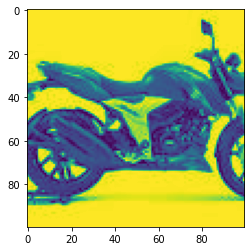

In [232]:
#READ  DATASET --TESTING

for category in CATEGORIES:
    path=os.path.join(TRAINING_DATADIR+category)
    for img in os.listdir(path):
        img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_arr)
        plt.show();
        break;
    break;
        
    


In [233]:
#LOAD TRAINING DATA FROM DIRECTORY
training_data =[];
IMG_SIZE=60;
for category in CATEGORIES:
    path=os.path.join(TRAINING_DATADIR+category);
    lable=CATEGORIES.index(category)
    print(lable)
    for img in os.listdir(path):
            try:
                    img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE);
                    resized_img_arr= cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE));
                    training_data.append([resized_img_arr,lable]);
            except Exception as e:
                pass;

                    

0
1
2


In [234]:
#LOAD TEST DATA FROM DIRECTORY
test_data =[];
IMG_SIZE=60;
for category in CATEGORIES:
    path=os.path.join(TEST_DATADIR+category);
    
    for img in os.listdir(path):
            try:
                    img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE);
                    resized_img_arr= cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE));
                    test_data.append([resized_img_arr]);
            except Exception as e:
                pass;

In [235]:
print(len(training_data))

156


In [236]:
#FORMAT TEST DATA 
test_data=np.array(test_data).reshape(-1,IMG_SIZE,IMG_SIZE,1)
test_data=test_data.astype(np.float64)

In [237]:
print(test_data.shape, test_data.dtype)

(20, 60, 60, 1) float64


In [239]:
#RANDOMIZE TRAINING DATA FOR MORE GENERALIZING
random.shuffle(training_data)

In [240]:
#CREATE FEATURE AND TARGET 
x=[]
y=[]

for feat, lable in training_data:
    x.append(feat);
    y.append(lable);

#4TH PARAMETER 1 IS FOR GRAYSCALE , CAN BE SET TO 3 FOR RGB COLOR IMAGES    
x=np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1) 
x=x.astype(np.float64)

In [241]:
 #SAVE x
pickle.dump( x,open("features",'wb'))

In [242]:
#SAVE y
pickle.dump( y,open("target",'wb')) 

In [243]:
x.shape[1:]

(60, 60, 1)

In [244]:
print(x.shape, x.dtype)

(156, 60, 60, 1) float64


In [245]:
#FORMAT TARGET DATA 
y=np.array(y).astype(np.float64)
print(y.shape, y.dtype)

(156,) float64


In [246]:
y

array([1., 2., 1., 2., 1., 1., 1., 2., 1., 2., 0., 0., 2., 2., 2., 0., 2.,
       0., 2., 2., 2., 2., 0., 0., 1., 0., 0., 1., 0., 1., 2., 0., 0., 1.,
       2., 0., 0., 2., 1., 2., 0., 2., 0., 0., 0., 1., 1., 1., 2., 2., 2.,
       0., 2., 2., 2., 1., 2., 1., 2., 2., 2., 1., 1., 0., 1., 2., 1., 0.,
       1., 0., 1., 2., 1., 2., 2., 0., 1., 0., 1., 2., 2., 2., 0., 2., 2.,
       2., 1., 0., 2., 0., 2., 2., 2., 1., 2., 2., 0., 2., 1., 2., 2., 1.,
       2., 2., 2., 2., 0., 0., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0.,
       1., 2., 2., 1., 0., 2., 2., 2., 0., 2., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 2.,
       0., 1., 2.])

In [247]:
#NORMALIZE DATA 
x=x/255.0 

In [248]:
#CONVERT TARGET TRAIN DATA  INTO CATEGORICAL DATA
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

In [249]:
#CREATE A CNN MODEL 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,MaxPool2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))


In [250]:
#INITIALIZE EARLY STOPPING 
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='accuracy', mode='max', verbose=1,patience=10)

In [251]:
# THIS CONVERTS OUR 3D FEATURE MAPS TO 1D FEATURE VECTORS
model.add(Flatten()) 

model.add(Dense(units=400, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=200, activation='relu'))
model.add(Dropout(0.2))
#FINAL OUTPUT LAYER
model.add(Dense(units=3, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x,y,validation_split=0.1,epochs=300,
    max_queue_size=10,
    workers=1,
    use_multiprocessing=False,
    callbacks=[es])

Train on 140 samples, validate on 16 samples
Epoch 1/300
140/140 [==============================] - 1s 9ms/sample - loss: 1.0906 - accuracy: 0.4071 - val_loss: 1.2592 - val_accuracy: 0.1250
Epoch 2/300
140/140 [==============================] - 0s 3ms/sample - loss: 1.0908 - accuracy: 0.4214 - val_loss: 1.1266 - val_accuracy: 0.1250
Epoch 3/300
140/140 [==============================] - 0s 3ms/sample - loss: 1.0557 - accuracy: 0.4071 - val_loss: 1.1919 - val_accuracy: 0.2500
Epoch 4/300
140/140 [==============================] - 0s 3ms/sample - loss: 1.0108 - accuracy: 0.5429 - val_loss: 1.1558 - val_accuracy: 0.3125
Epoch 5/300
140/140 [==============================] - 0s 3ms/sample - loss: 0.9303 - accuracy: 0.5214 - val_loss: 1.0638 - val_accuracy: 0.3125
Epoch 6/300
140/140 [==============================] - 0s 3ms/sample - loss: 0.7843 - accuracy: 0.6643 - val_loss: 1.3525 - val_accuracy: 0.3125
Epoch 7/300
140/140 [==============================] - 0s 3ms/sample - loss: 0.7072 -

In [252]:
#SAVE TRAINED MODEL FOR FUTURE USE
model.save('imageClassification_easrly_stopping_P10.h5')

In [253]:
#PERFORM PREDICTION USIGN TRAINED MODEL
pred=model.predict(test_data[1:])

In [255]:
pred

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

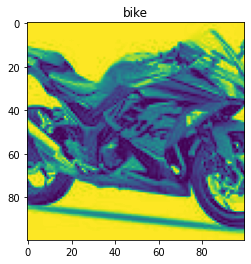

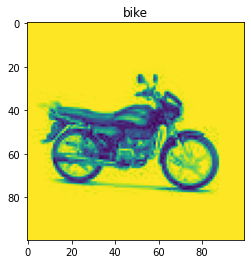

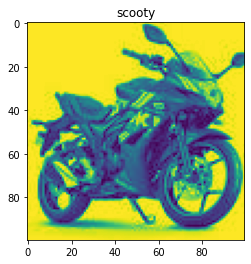

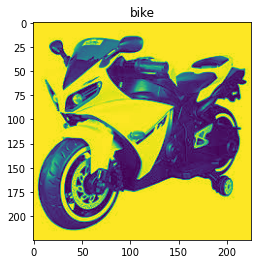

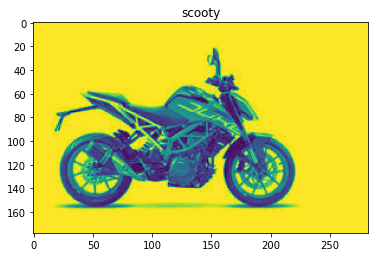

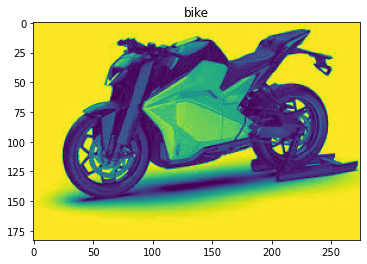

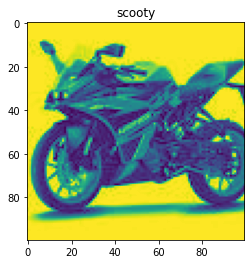

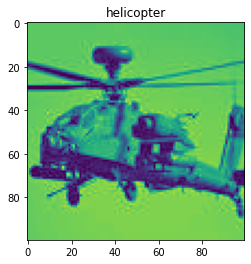

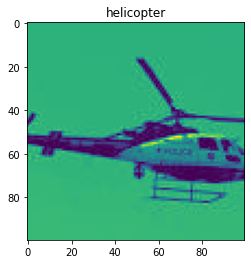

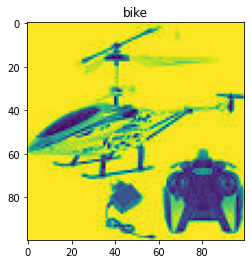

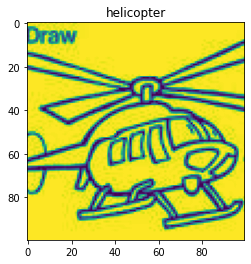

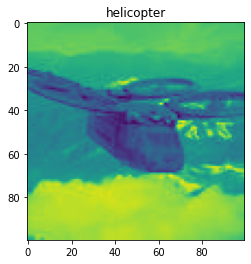

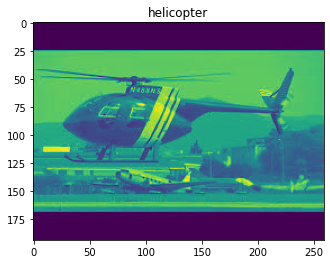

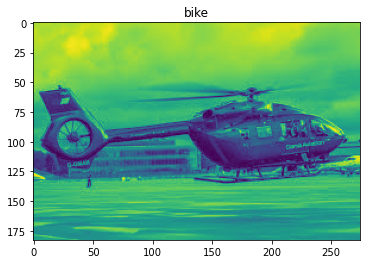

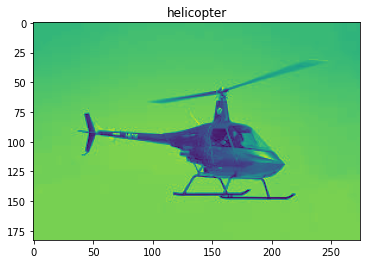

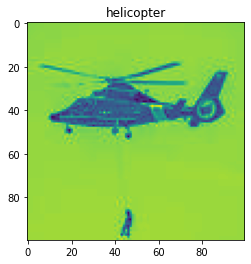

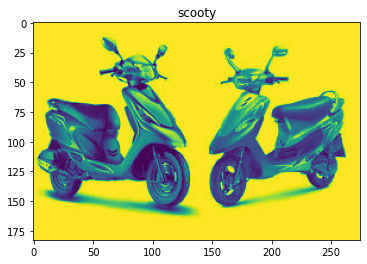

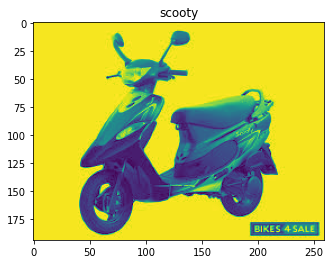

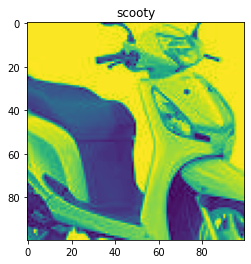

In [265]:
#TEST WITH TEST DATA 
i=0
for category in CATEGORIES:
    path=os.path.join(TEST_DATADIR+category)
    lable=CATEGORIES.index(category)
    for img in os.listdir(path):
        
        img_arr= cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        plt.title( CATEGORIES[np.where(pred[i] == np.amax(pred[i]))[0][0]])
        plt.imshow(img_arr)
        i=i+1;
        plt.show();
        
        
    